# Spotify skip music

We have to predict the reason behind the skip songs and analyze the track list as per requirements

![](Spotify_logo.jpg)

## Variables descriptions

session_id: unique identifier for the session that this row is a part of

session_position: {1-20} - position of row within the session

session_length: {10-20} - number of rows in session

track_id_clean: unique identifier for the track played. This is linked with track_id in the track features and metadata table.

skip_1: Boolean indicating if the track was only played very briefly

skip_2: Boolean indicating if the track was only played briefly

skip_3: Boolean indicating if most of track was played

not_skipped: Boolean indicating that the track was played in its entirety

context_switch: Boolean indicating if the user changed context between previous row and the current row. This could for 
example occur if the user switched from one playlist to another.

no_pause_before_play: Boolean indicating if there was no pause between playback of the previous track and this track.

short_pause_before_play: Boolean indicating if there was a short pause between playback of the previous track and this track

long_pause_before_play: Boolean indicating if there was a long pause between playback of the previous track and this track

hist_user_behavior_n_seekfwd: Number of times the user did a seek forward within track

hist_user_behavior_n_seekback: Number of times the user did a seek back within track

hist_user_behavior_is_shuffle: Boolean indicating if the user encountered this track while shuffle mode was activated

hour_of_day: {0-23} - The hour of the day
date

premium: Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.

context_type: E.g. editorial playlist - what type of context the playback occurred within

hist_user_behavior_reason_start: E.g. fwdbtn - the user action which led to the current track being played

hist_user_behavior_reason_end: E.g. trackdone - the user action which led to the current track playback ending

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv(r'F:\Python class\spotify_data\data\train_data_20.csv')
test_data=pd.read_csv(r'F:\Python class\spotify_data\data\test_data_20.csv')

In [3]:
print(train_data.shape)
train_data.head()

(1181560, 40)


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1.0,t_71d34c2f-1c87-43df-83ba-00832e12194c,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1.0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [4]:
print(test_data.shape)
test_data.head()

(73960, 40)


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0018207a-324a-4309-9272-1f6e476f51b0,0.000000,1.0,t_bacf06d3-9185-4183-84ea-ff0db51475ce,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,63_0018207a-324a-4309-9272-1f6e476f51b0,0.052632,1.0,t_204562f8-e089-4305-be51-19913efdfbc6,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,63_0018207a-324a-4309-9272-1f6e476f51b0,0.105263,1.0,t_9a03f300-6504-4c7a-92b1-4cd88354ee74,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0018207a-324a-4309-9272-1f6e476f51b0,0.157895,1.0,t_297efa33-b070-4e5d-bb42-111237295b6c,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,63_0018207a-324a-4309-9272-1f6e476f51b0,0.210526,1.0,t_8fd0c874-e115-4b75-8351-54acd7876edf,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
print(train_data.info())
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181560 entries, 0 to 1181559
Data columns (total 40 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   session_id                                  1181560 non-null  object 
 1   session_position                            1181560 non-null  float64
 2   session_length                              1181560 non-null  float64
 3   track_id_clean                              1181560 non-null  object 
 4   skip_1                                      1181560 non-null  int64  
 5   skip_2                                      1181560 non-null  int64  
 6   skip_3                                      1181560 non-null  int64  
 7   not_skipped                                 1181560 non-null  int64  
 8   context_switch                              1181560 non-null  int64  
 9   no_pause_before_play                        1181560 non-n

In [6]:
train_data.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,1.181560e+06,1181560.0,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,...,1.181560e+06,1.181560e+06,1181560.0,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06,1.181560e+06
mean,5.000000e-01,1.0,4.593233e-01,5.505315e-01,6.709130e-01,3.127594e-01,4.010376e-02,7.924143e-01,1.365669e-01,1.575849e-01,...,3.130023e-01,6.863807e-04,0.0,7.470463e-02,2.200481e-05,8.530248e-02,5.139951e-01,1.182335e-03,1.479400e-03,3.233141e-01
std,3.034886e-01,0.0,4.983429e-01,4.974402e-01,4.698818e-01,4.636175e-01,1.962027e-01,4.055786e-01,3.433897e-01,3.643515e-01,...,4.637155e-01,2.618989e-02,0.0,2.629143e-01,4.690879e-03,2.793314e-01,4.998043e-01,3.436478e-02,3.843453e-02,4.677417e-01
min,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e-01,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e-01,1.0,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.500000e-01,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
train_data.columns

Index(['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_s

In [8]:
'''
fig, axs = plt.subplots(38,figsize=(20,130))

plt1 = sns.boxplot(train_data['session_position'], ax = axs[0])
plt2 = sns.boxplot(train_data['session_length'],ax=axs[1])
plt3 = sns.boxplot(train_data['skip_1'],ax=axs[2])
plt4 = sns.boxplot(train_data['skip_2'],ax=axs[3])
plt5 = sns.boxplot(train_data['skip_3'],ax=axs[4])
plt6 = sns.boxplot(train_data['not_skipped'],ax=axs[5])
plt7 = sns.boxplot(train_data['context_switch'],ax=axs[6])
plt8 = sns.boxplot(train_data['no_pause_before_play'],ax=axs[7])
plt9 = sns.boxplot(train_data['short_pause_before_play'],ax=axs[8])
plt10 = sns.boxplot(train_data['long_pause_before_play'],ax=axs[9])
plt11 = sns.boxplot(train_data['hist_user_behavior_n_seekfwd'], ax = axs[10])
plt12 = sns.boxplot(train_data['hist_user_behavior_n_seekback'],ax=axs[11])
plt13 = sns.boxplot(train_data['hist_user_behavior_is_shuffle'],ax=axs[12])
plt14 = sns.boxplot(train_data['hour_of_day'],ax=axs[13])
plt15 = sns.boxplot(train_data['premium'],ax=axs[14])
plt16 = sns.boxplot(train_data['context_type_catalog'],ax=axs[15])
plt17 = sns.boxplot(train_data['context_type_charts'],ax=axs[16])
plt18 = sns.boxplot(train_data['context_type_editorial_playlist'],ax=axs[17])
plt19 = sns.boxplot(train_data['context_type_personalized_playlist'],ax=axs[18])
plt20 = sns.boxplot(train_data['context_type_radio'],ax=axs[19])
plt21 = sns.boxplot(train_data['context_type_user_collection'], ax = axs[20])
plt22 = sns.boxplot(train_data['hist_user_behavior_reason_start_appload'],ax=axs[21])
plt23 = sns.boxplot(train_data['hist_user_behavior_reason_start_backbtn'],ax=axs[22])
plt24 = sns.boxplot(train_data['hist_user_behavior_reason_start_clickrow'],ax=axs[23])
plt25 = sns.boxplot(train_data['hist_user_behavior_reason_start_endplay'],ax=axs[24])
plt26 = sns.boxplot(train_data['hist_user_behavior_reason_start_fwdbtn'],ax=axs[25])
plt27 = sns.boxplot(train_data['hist_user_behavior_reason_start_playbtn'],ax=axs[26])
plt28 = sns.boxplot(train_data['hist_user_behavior_reason_start_remote'],ax=axs[27])
plt29 = sns.boxplot(train_data['hist_user_behavior_reason_start_trackdone'],ax=axs[28])
plt30 = sns.boxplot(train_data['hist_user_behavior_reason_start_trackerror'],ax=axs[29])
plt31 = sns.boxplot(train_data['hist_user_behavior_reason_end_appload'],ax=axs[30])
plt32 = sns.boxplot(train_data['hist_user_behavior_reason_end_backbtn'],ax=axs[31])
plt33 = sns.boxplot(train_data['hist_user_behavior_reason_end_clickrow'],ax=axs[32])
plt34 = sns.boxplot(train_data['hist_user_behavior_reason_end_endplay'],ax=axs[33])
plt35 = sns.boxplot(train_data['hist_user_behavior_reason_end_fwdbtn'],ax=axs[34])
plt36 = sns.boxplot(train_data['hist_user_behavior_reason_end_logout'],ax=axs[35])
plt37 = sns.boxplot(train_data['hist_user_behavior_reason_end_remote'],ax=axs[36])
plt38 = sns.boxplot(train_data['hist_user_behavior_reason_end_trackdone'],ax=axs[37])'''
print("The below bar plot created on checking outliers by Rohit Thorat")

The below bar plot created on checking outliers by Rohit Thorat


### Pre-Processing of train data.

In [9]:
#transform categorical data to numerical

from sklearn import preprocessing #convert categorical data into numerical
colname=['session_id','track_id_clean']
le=preprocessing.LabelEncoder()

for x in colname:
    train_data[x]=le.fit_transform(train_data[x])

In [10]:
train_data.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0,0.000000,1.0,20644,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.052632,1.0,20644,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.105263,1.0,17742,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0.157895,1.0,88363,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0.210526,1.0,128817,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


### Test Data working

In [11]:
test_data.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0018207a-324a-4309-9272-1f6e476f51b0,0.000000,1.0,t_bacf06d3-9185-4183-84ea-ff0db51475ce,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,63_0018207a-324a-4309-9272-1f6e476f51b0,0.052632,1.0,t_204562f8-e089-4305-be51-19913efdfbc6,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,63_0018207a-324a-4309-9272-1f6e476f51b0,0.105263,1.0,t_9a03f300-6504-4c7a-92b1-4cd88354ee74,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0018207a-324a-4309-9272-1f6e476f51b0,0.157895,1.0,t_297efa33-b070-4e5d-bb42-111237295b6c,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,63_0018207a-324a-4309-9272-1f6e476f51b0,0.210526,1.0,t_8fd0c874-e115-4b75-8351-54acd7876edf,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [12]:
test_data.isnull().sum()

session_id                                    0
session_position                              0
session_length                                0
track_id_clean                                0
skip_1                                        0
skip_2                                        0
skip_3                                        0
not_skipped                                   0
context_switch                                0
no_pause_before_play                          0
short_pause_before_play                       0
long_pause_before_play                        0
hist_user_behavior_n_seekfwd                  0
hist_user_behavior_n_seekback                 0
hist_user_behavior_is_shuffle                 0
hour_of_day                                   0
premium                                       0
context_type_catalog                          0
context_type_charts                           0
context_type_editorial_playlist               0
context_type_personalized_playlist      

In [13]:
x=test_data.nunique().sort_values().index
x

Index(['session_length', 'hist_user_behavior_reason_end_appload',
       'context_type_editorial_playlist', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_trackdone', 'context_type_radio',
       'hist_user_behavior_reason_start_trackerror',
       'hist_user_behavior_reason_end_backbtn',
       'hist_user_behavior_reason_end_clickrow',
       'hist_user_behavior_reason_end_endplay',
       'hist_user_behavior_reason_end_fwdbtn',
       'hist_user_behavior_reason_end_logout',
       'hist_user_behavior_reason_start_remote',
       'context_type_personalized_playlist',
       'hist_user_behavior_reason_end_trackdone', 'context_type_charts',
       'skip_1', 'skip_2', 

In [14]:
for i in x:
    print(i)
    print(test_data[i].value_counts())
    print()

session_length
1.0    73960
Name: session_length, dtype: int64

hist_user_behavior_reason_end_appload
0    73960
Name: hist_user_behavior_reason_end_appload, dtype: int64

context_type_editorial_playlist
0    61883
1    12077
Name: context_type_editorial_playlist, dtype: int64

context_type_user_collection
0    42021
1    31939
Name: context_type_user_collection, dtype: int64

hist_user_behavior_reason_start_appload
0    73295
1      665
Name: hist_user_behavior_reason_start_appload, dtype: int64

hist_user_behavior_reason_start_backbtn
0    68558
1     5402
Name: hist_user_behavior_reason_start_backbtn, dtype: int64

hist_user_behavior_reason_start_clickrow
0    66400
1     7560
Name: hist_user_behavior_reason_start_clickrow, dtype: int64

hist_user_behavior_reason_start_endplay
0    73956
1        4
Name: hist_user_behavior_reason_start_endplay, dtype: int64

hist_user_behavior_reason_start_fwdbtn
1    37141
0    36819
Name: hist_user_behavior_reason_start_fwdbtn, dtype: int64

hist_

In [15]:
print(test_data[["hour_of_day"]].tail(20))


       hour_of_day
73940     0.826087
73941     0.869565
73942     0.869565
73943     0.869565
73944     0.869565
73945     0.869565
73946     0.869565
73947     0.869565
73948     0.869565
73949     0.869565
73950     0.869565
73951     0.869565
73952     0.869565
73953     0.869565
73954     0.869565
73955     0.869565
73956     0.869565
73957     0.869565
73958     0.869565
73959     0.869565


In [16]:
A=test_data[['skip_1','skip_2','skip_3', 'not_skipped','context_type_editorial_playlist',
             'hist_user_behavior_reason_start_appload','hist_user_behavior_reason_start_backbtn','context_type_charts',
            'session_position','session_length','context_switch','no_pause_before_play']]

Need to drop this appload due to less data contains redarding data structure


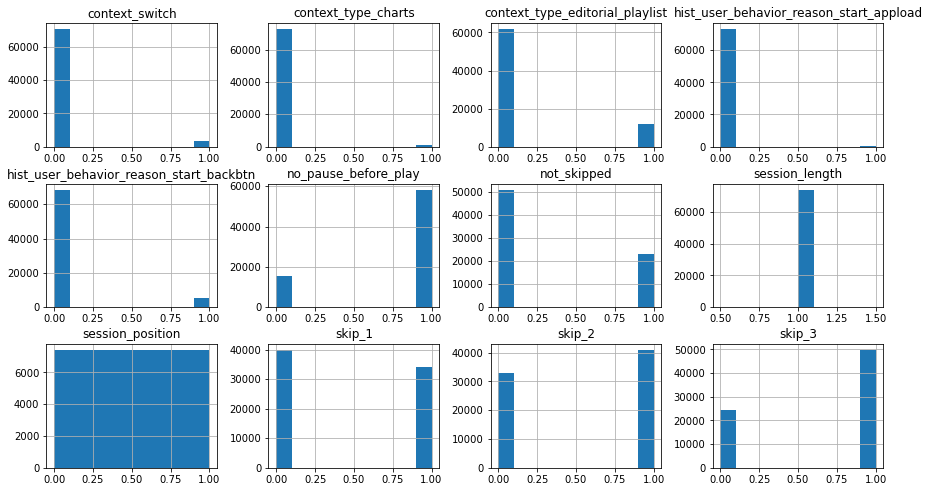

In [17]:
test_data[[i for i in A]].hist(figsize=(15, 20), layout=(7,4));

print('Need to drop this appload due to less data contains redarding data structure')

In [18]:
B=test_data[['short_pause_before_play','long_pause_before_play','hist_user_behavior_n_seekfwd',
             'hist_user_behavior_n_seekback','hist_user_behavior_is_shuffle','hour_of_day','premium','context_type_catalog',
            'context_type_personalized_playlist','context_type_user_collection']]

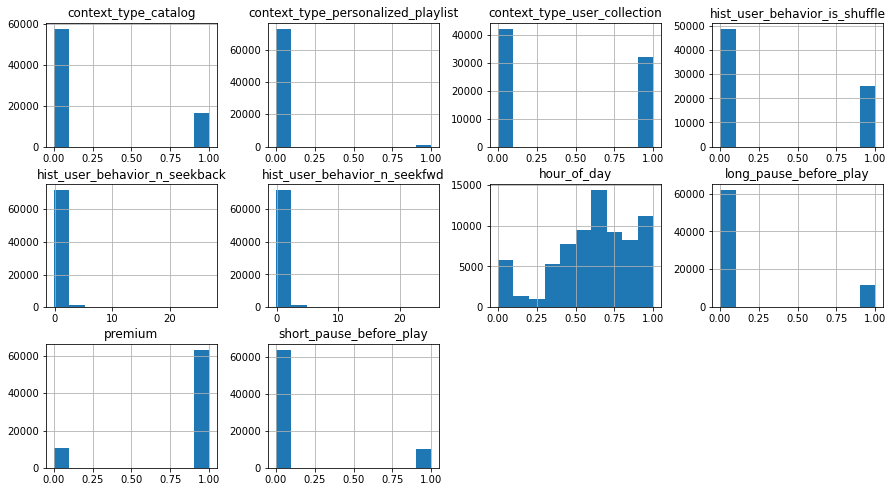

In [19]:
test_data[[i for i in B]].hist(figsize=(15, 20), layout=(7,4));

In [20]:
C=test_data[['hist_user_behavior_reason_start_clickrow','hist_user_behavior_reason_start_endplay','hist_user_behavior_reason_start_fwdbtn',
             'hist_user_behavior_reason_start_playbtn','hist_user_behavior_reason_start_remote','hist_user_behavior_reason_start_trackdone',
            'hist_user_behavior_reason_start_trackerror','hist_user_behavior_reason_end_backbtn','hist_user_behavior_reason_end_clickrow',
            'hist_user_behavior_reason_end_endplay','hist_user_behavior_reason_end_fwdbtn','hist_user_behavior_reason_end_logout',
            'hist_user_behavior_reason_end_remote','hist_user_behavior_reason_end_trackdone']]

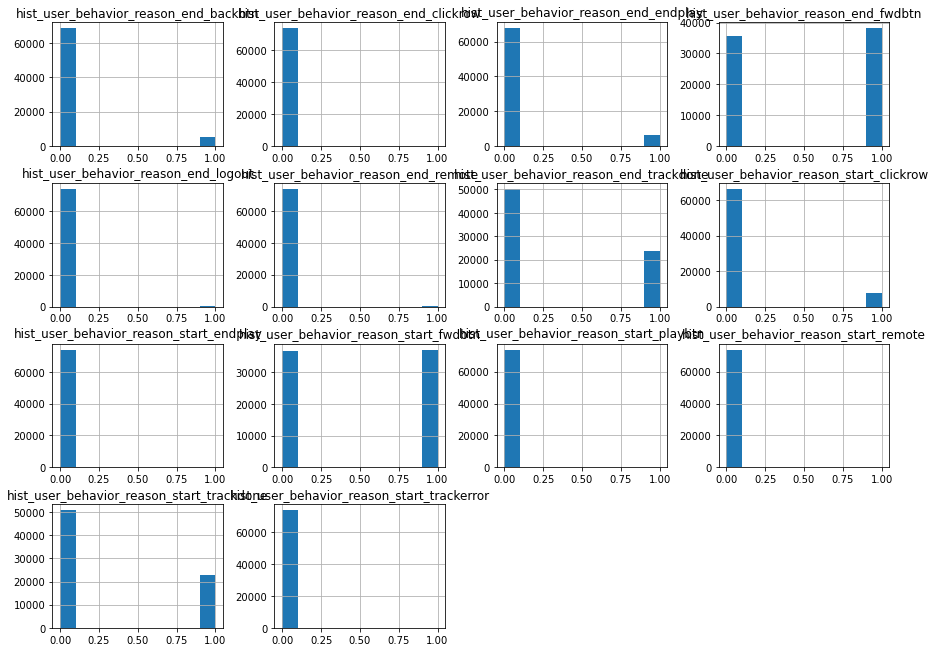

In [21]:
test_data[[i for i in C]].hist(figsize=(15, 20), layout=(7,4));

Need to drop this due to trackerror with premium members


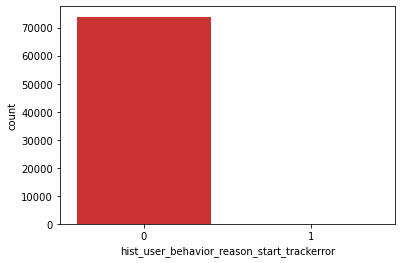

In [22]:
sns.countplot(x="hist_user_behavior_reason_start_trackerror",data=test_data,palette="Set1")
             
plt.xticks(rotation=0)

print("Need to drop this due to trackerror with premium members")

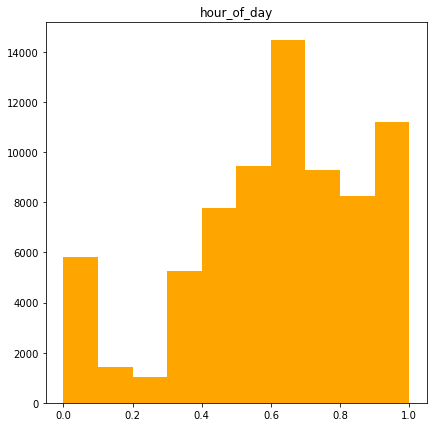

In [23]:
import numpy as np
plt.figure(figsize=(15,7))
plt.subplot(122)
plt.hist(x="hour_of_day",data=test_data,bins=10,color="orange")
plt.title("hour_of_day")
plt.show()

### preprocessing on test data

In [24]:
from sklearn import preprocessing #convert categorical data into numerical
colname=['session_id','track_id_clean']
le=preprocessing.LabelEncoder()

for x in colname:
    test_data[x]=le.fit_transform(test_data[x])

In [25]:
test_data.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0,0.000000,1.0,22410,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.052632,1.0,3880,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0.105263,1.0,18536,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0.157895,1.0,5002,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0.210526,1.0,17298,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Creating Training and testing data set

In [26]:
X_train=train_data.values[:,:-1]
Y_train=train_data.values[:,-1]
Y_train=Y_train.astype(int)

In [27]:
X_test=test_data.values[:,:-1]

In [28]:
#Scaling Data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train) #scaling function ------ X variable will map with scaler function /formula

X_train= scaler.transform(X_train)

X_test= scaler.transform(X_test)


#discripency is in X, becouse X has more variables

In [29]:
print(X_train)

[[-1.73202149 -1.64750894  0.         ... -1.02839304 29.0651651
  -0.03849145]
 [-1.73202149 -1.47408695  0.         ... -1.02839304 -0.03440545
  -0.03849145]
 [-1.73202149 -1.30066495  0.         ...  0.97239087 -0.03440545
  -0.03849145]
 ...
 [ 1.73202149  1.30066495  0.         ... -1.02839304 -0.03440545
  -0.03849145]
 [ 1.73202149  1.47408695  0.         ... -1.02839304 -0.03440545
  -0.03849145]
 [ 1.73202149  1.64750894  0.         ... -1.02839304 -0.03440545
  -0.03849145]]


In [30]:
X=test_data[['session_id', 'session_position', 'session_length', 'track_id_clean',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'premium', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personalized_playlist',
       'context_type_radio', 'context_type_user_collection',
       'hist_user_behavior_reason_start_appload',
       'hist_user_behavior_reason_start_backbtn',
       'hist_user_behavior_reason_start_clickrow',
       'hist_user_behavior_reason_start_endplay',
       'hist_user_behavior_reason_start_fwdbtn',
       'hist_user_behavior_reason_start_playbtn',
       'hist_user_behavior_reason_start_remote',
       'hist_user_behavior_reason_start_trackdone',
       'hist_user_behavior_reason_start_trackerror',
       'hist_user_behavior_reason_end_appload',
       'hist_user_behavior_reason_end_backbtn',
       'hist_user_behavior_reason_end_clickrow',
       'hist_user_behavior_reason_end_endplay',
       'hist_user_behavior_reason_end_fwdbtn',
       'hist_user_behavior_reason_end_logout',
       'hist_user_behavior_reason_end_remote',
       'hist_user_behavior_reason_end_trackdone']]

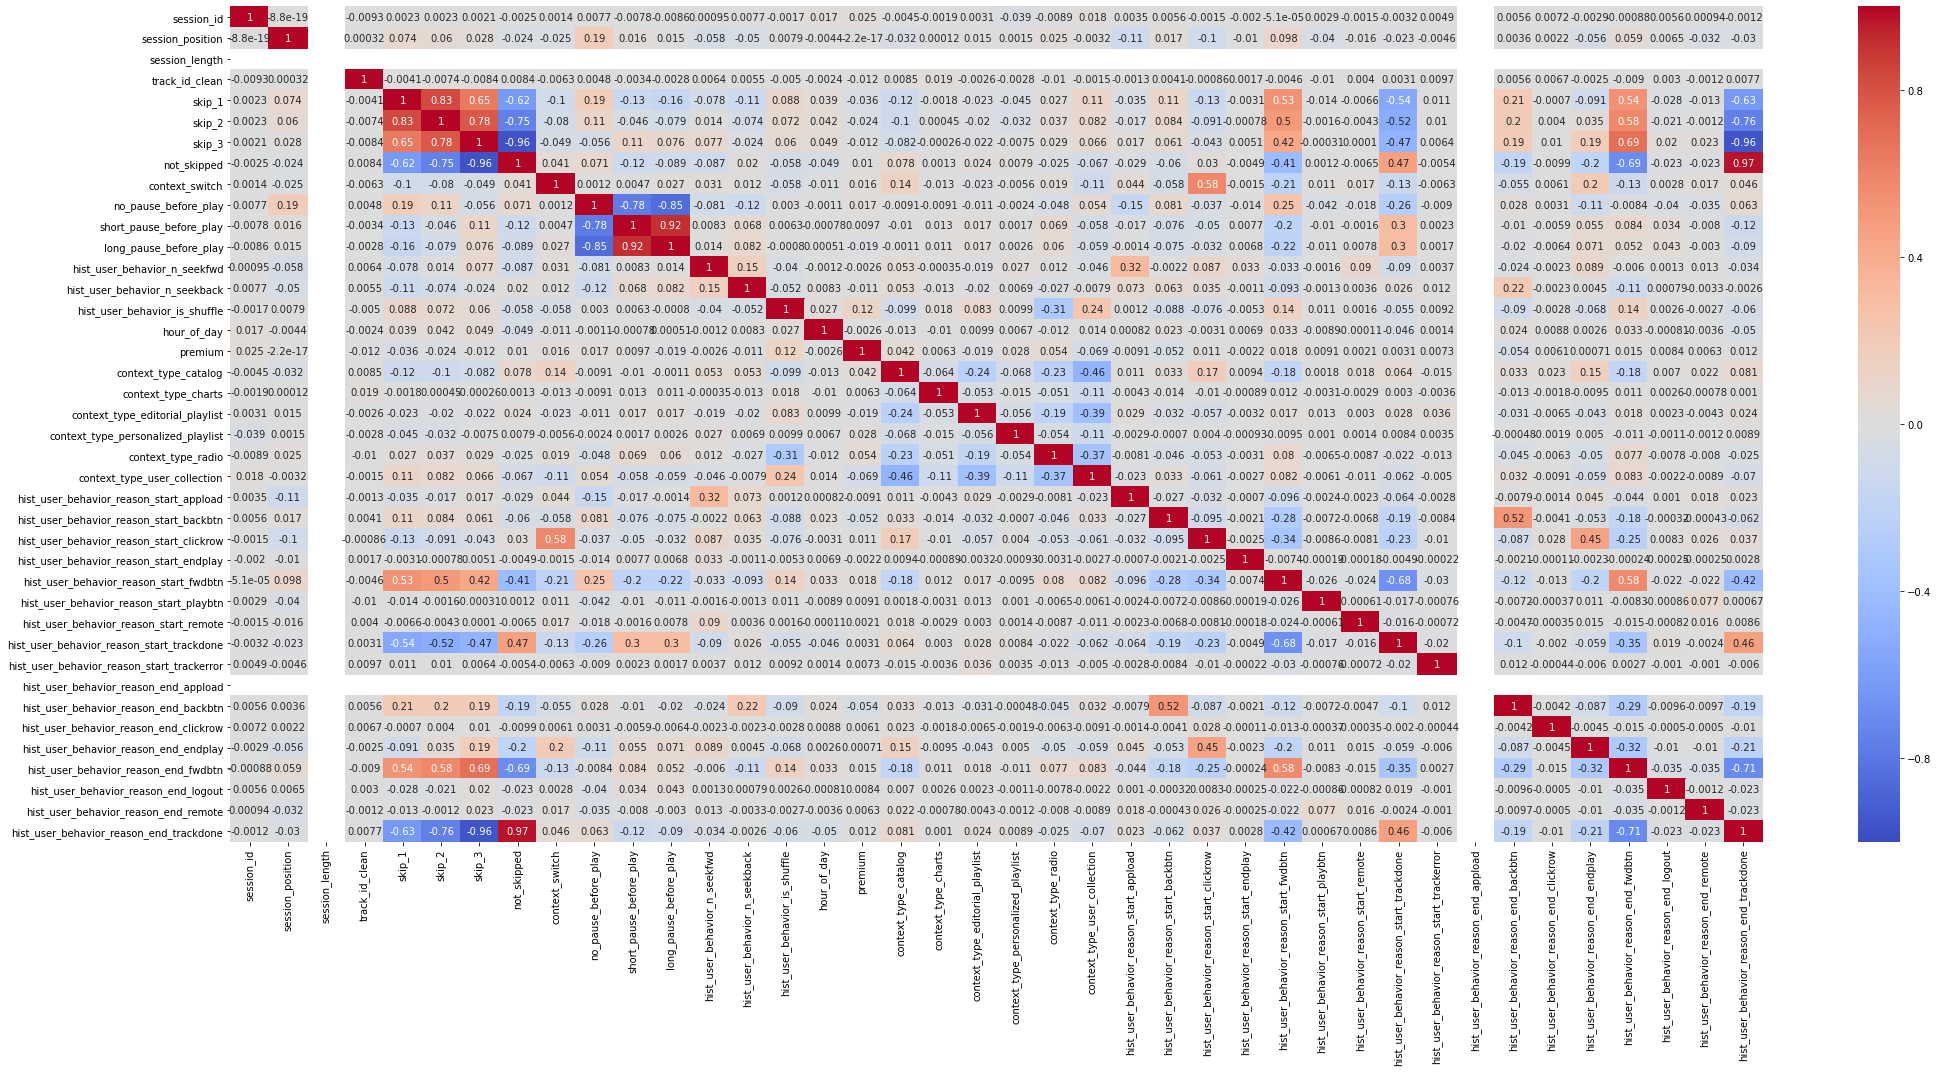

In [31]:
x=test_data.loc[:,:].corr()
plt.figure(figsize=(30,15))
sns.heatmap(x,annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.tight_layout()

In [32]:
test_data.nunique()

session_id                                     3698
session_position                                 20
session_length                                    1
track_id_clean                                30821
skip_1                                            2
skip_2                                            2
skip_3                                            2
not_skipped                                       2
context_switch                                    2
no_pause_before_play                              2
short_pause_before_play                           2
long_pause_before_play                            2
hist_user_behavior_n_seekfwd                     16
hist_user_behavior_n_seekback                    21
hist_user_behavior_is_shuffle                     2
hour_of_day                                      24
premium                                           2
context_type_catalog                              2
context_type_charts                               2
context_type

In [33]:
df_test=test_data.iloc[:73900,:]
df_test

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0,0.000000,1.0,22410,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.052632,1.0,3880,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0.105263,1.0,18536,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0.157895,1.0,5002,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0.210526,1.0,17298,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73895,3694,0.789474,1.0,15920,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
73896,3694,0.842105,1.0,15213,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
73897,3694,0.894737,1.0,25051,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
73898,3694,0.947368,1.0,8892,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [34]:
df_train=train_data.iloc[:73900,:]
df_train

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0,0.000000,1.0,20644,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.052632,1.0,20644,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.105263,1.0,17742,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0.157895,1.0,88363,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0.210526,1.0,128817,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73895,3694,0.789474,1.0,115615,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
73896,3694,0.842105,1.0,154674,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
73897,3694,0.894737,1.0,1375,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
73898,3694,0.947368,1.0,180858,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [35]:
print(test_data.iloc[:,5])

0        0
1        0
2        0
3        1
4        1
        ..
73955    0
73956    0
73957    1
73958    1
73959    1
Name: skip_2, Length: 73960, dtype: int64


In [36]:
X1_train=df_train.values[:,:5]
Y1_train=df_train.values[:,5]
Y1_train=Y1_train.astype(int)

In [37]:
X1_test=df_test.values[:,:5]

In [38]:
#Scaling Data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X1_train) #scaling function ------ X variable will map with scaler function /formula

X1_train= scaler.transform(X1_train)

X1_test= scaler.transform(X1_test)


#discripency is in X, becouse X has more variables

In [39]:
print(X1_train)

[[-1.73158212 -1.64750894  0.         -1.39388554  1.08924525]
 [-1.73158212 -1.47408695  0.         -1.39388554 -0.91806689]
 [-1.73158212 -1.30066495  0.         -1.44451586 -0.91806689]
 ...
 [ 1.73158212  1.30066495  0.         -1.73006601  1.08924525]
 [ 1.73158212  1.47408695  0.          1.40132012 -0.91806689]
 [ 1.73158212  1.64750894  0.         -0.41624224 -0.91806689]]


In [40]:
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=1.0,gamma=0.1)
svc_model.fit(X1_train,Y1_train)
Y_pred=svc_model.predict(X1_test)
print(list(Y_pred))

[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [41]:
test_data2=df_test #overwrite
test_data2['Skip_songs']=Y_pred #insert new column
test_data2.head()


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,Skip_songs
0,0,0.000000,1.0,22410,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.052632,1.0,3880,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0.105263,1.0,18536,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0.157895,1.0,5002,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0.210526,1.0,17298,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [42]:
test_data2['Skip_songs']=test_data2['Skip_songs'].map({1:"skipped",
                                                           0:"Not_skipped"})

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
test_data2

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,Skip_songs
0,0,0.000000,1.0,22410,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Not_skipped
1,0,0.052632,1.0,3880,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,Not_skipped
2,0,0.105263,1.0,18536,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,Not_skipped
3,0,0.157895,1.0,5002,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,skipped
4,0,0.210526,1.0,17298,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,skipped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73895,3694,0.789474,1.0,15920,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,Not_skipped
73896,3694,0.842105,1.0,15213,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,Not_skipped
73897,3694,0.894737,1.0,25051,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Not_skipped
73898,3694,0.947368,1.0,8892,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,Not_skipped


In [44]:
Skip_graph=test_data2.Skip_songs.value_counts()
Skip_graph

Not_skipped    39827
skipped        34073
Name: Skip_songs, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

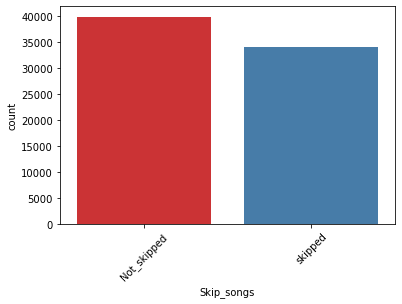

In [45]:
sns.countplot(x="Skip_songs",data=test_data2,palette="Set1",
             order=test_data2["Skip_songs"].value_counts().sort_index().index)
plt.xticks(rotation=45)

In [46]:
svc_model.score(X1_train,Y1_train)

0.90531799729364

In [47]:
import pickle

In [48]:
#save the model to disk
filename='svc_model.sav'
pickle.dump(svc_model,open(filename,'wb')) #wb means writebytes

In [49]:
#load the model from disk
loaded_model=pickle.load(open(filename,'rb')) #rb means Read bytes
#Y_pred=loaded_model.predict(X_test)
#Y_pred
result=loaded_model.score(X1_train,Y1_train)
print(result)

0.90531799729364


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) #90.51
#classifier=KNeighborsClassifier(n_neighbors=11,metric='euclidean') #90.28
#classifier=svm.SVC(kernel='rbf',C=10.0,gamma=0.001) #90.51
classifier=LogisticRegression() #90.53
#classifier=DecisionTreeClassifier(random_state=10) #82.90

#performing kfold_cross_validation
from sklearn.model_selection import KFold #earlier model selection was called as cross_validation
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X1_train,
                                                 y=Y1_train, cv=kfold_cv)#clasifier data is sent to train data
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


KFold(n_splits=10, random_state=None, shuffle=False)
[0.90257104 0.90202977 0.90893099 0.90987821 0.90622463 0.90473613
 0.90771313 0.90094723 0.90473613 0.90541272]
0.9053179972936402
